# 1. Setup Environment
Python installed along with necessary libraries:

In [11]:
pip install numpy matplotlib gdal


# 2. Loading Raster Data
Use GDAL to load raster data into Python:


In [13]:
from osgeo import gdal

# Open raster dataset
file_path = 'https://download.osgeo.org/geotiff/samples/usgs/c41078a1.tif'
dataset = gdal.Open(file_path)

if dataset is None:
    print("Failed to open raster file")
    exit(1)

# Access metadata and band information
print('Driver:', dataset.GetDriver().ShortName, '/', dataset.GetDriver().LongName)
print('Size:', dataset.RasterXSize, 'x', dataset.RasterYSize, 'x', dataset.RasterCount)
print('Projection:', dataset.GetProjection())


Driver: GTiff / GeoTIFF
Size: 7202 x 5593 x 1
Projection: PROJCS["WGS 84 / UTM zone 17N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32617"]]


# 3. Reading Raster Data
Extract raster data into a NumPy array for manipulation and analysis:

In [14]:
band = dataset.GetRasterBand(1)  # Accessing the first band
data = band.ReadAsArray()

# Get statistics (optional)
min_val = band.GetMinimum()
max_val = band.GetMaximum()
if min_val is None or max_val is None:
    (min_val, max_val) = band.ComputeRasterMinMax(True)
print('Min:', min_val, 'Max:', max_val)


Min: 0.0 Max: 12.0


# 4. Visualizing Raster Data
Use Matplotlib to visualize the raster data:

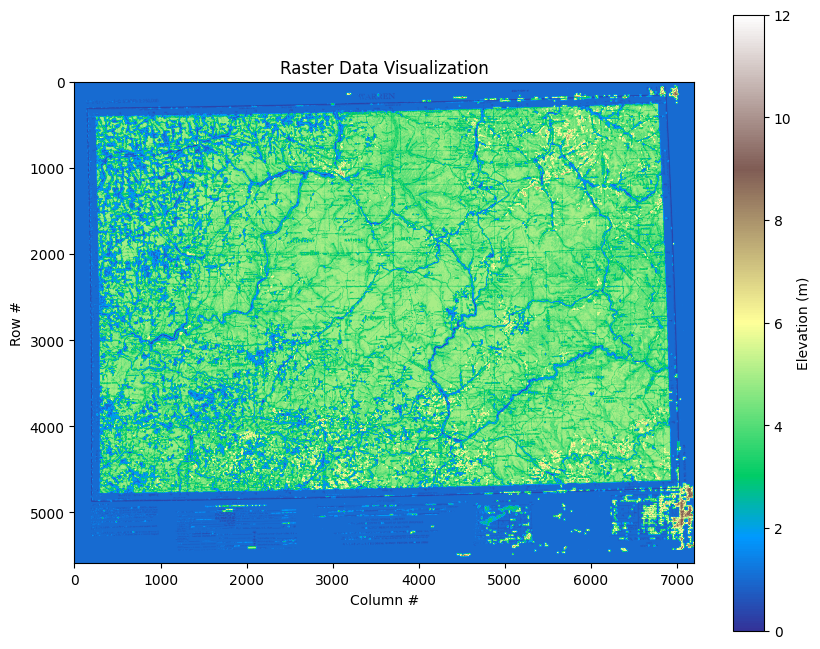

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(data, cmap='terrain')  # Adjust cmap based on data type
plt.colorbar(label='Elevation (m)')
plt.title('Raster Data Visualization')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()


# 5. Performing Analysis
Example: Calculating Mean Elevation

In [16]:
import numpy as np

mean_elevation = np.mean(data)
print('Mean Elevation:', mean_elevation)


Mean Elevation: 3.027358577362418


# Example: Thresholding and Classifying



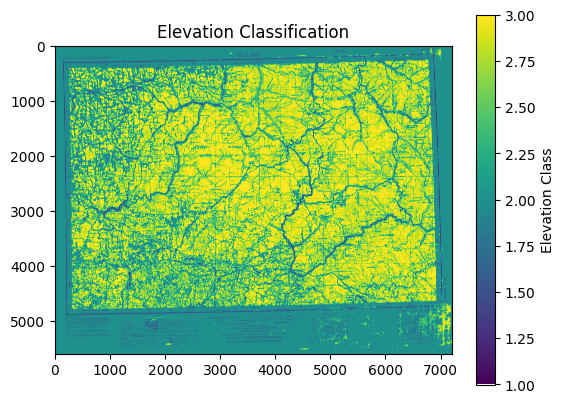

In [17]:
# Example: Classify elevation into low, medium, high
low = np.percentile(data, 33)
high = np.percentile(data, 66)

classified_data = np.zeros_like(data)
classified_data[data < low] = 1  # Low elevation
classified_data[(data >= low) & (data < high)] = 2  # Medium elevation
classified_data[data >= high] = 3  # High elevation

plt.imshow(classified_data, cmap='viridis')
plt.colorbar(label='Elevation Class')
plt.title('Elevation Classification')
plt.show()


In [18]:
dataset = None
